# Workshop 1

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Statistical analysis of company financial data using OLS regression to identify factors affecting productivity and profitability.

In [55]:
def plot_corr_matrix(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt=".4f")
    plt.title('Correlation Heatmap')
    plt.show()

## Challenge 1

¿Que factores/variables estan relacionadas o afectan la producción de las empresas?

In [56]:
df = pd.read_csv('data/empresas_2023.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   empresa         1072 non-null   object 
 1   year            1072 non-null   int64  
 2   ventas          1072 non-null   float64
 3   activos         1072 non-null   float64
 4   precio_accion   1072 non-null   float64
 5   numacciones     1072 non-null   float64
 6   retorno_accion  1054 non-null   float64
 7   utilidad        1072 non-null   float64
 8   deuda           1069 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 75.5+ KB


In [57]:
df.drop(columns=['empresa', 'year'], inplace=True)

In [58]:
df['cap'] = df['numacciones'] * df['precio_accion']

Market capitalization (cap) represents the total market value of a company's outstanding shares.

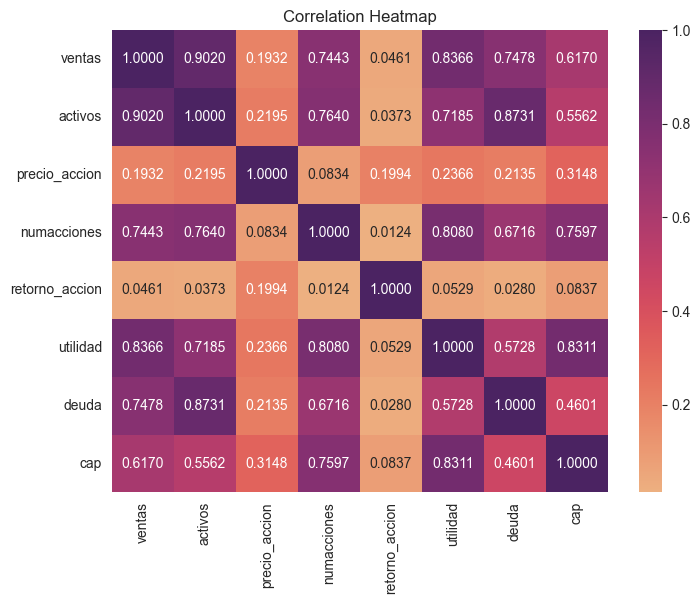

In [59]:
plot_corr_matrix(df)

In [60]:
def run_model(df, features, target):
    X = df[features]
    y = df[target]

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_with_const = sm.add_constant(x_train)
    model_sm = sm.OLS(y_train, X_with_const).fit()
    print(model_sm.summary())


In [61]:
run_model(df=df, features=['ventas', 'utilidad'], target='cap')

                            OLS Regression Results                            
Dep. Variable:                    cap   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     2628.
Date:                Mon, 13 Oct 2025   Prob (F-statistic):               0.00
Time:                        07:56:27   Log-Likelihood:                -16165.
No. Observations:                 857   AIC:                         3.234e+04
Df Residuals:                     854   BIC:                         3.235e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.757e+06   1.34e+06      3.551      0.0

A pesar tener buenos resultados ($R^2$ de 0.86), un cond. no. de 2.64e+07 implica una fuerte correlación entre los features seleccionados.

## Challenge 2

In [62]:
df['roa'] = df['utilidad'] / df['activos']

ROA (Return on Assets) measures how efficiently a company uses its assets to generate profit.

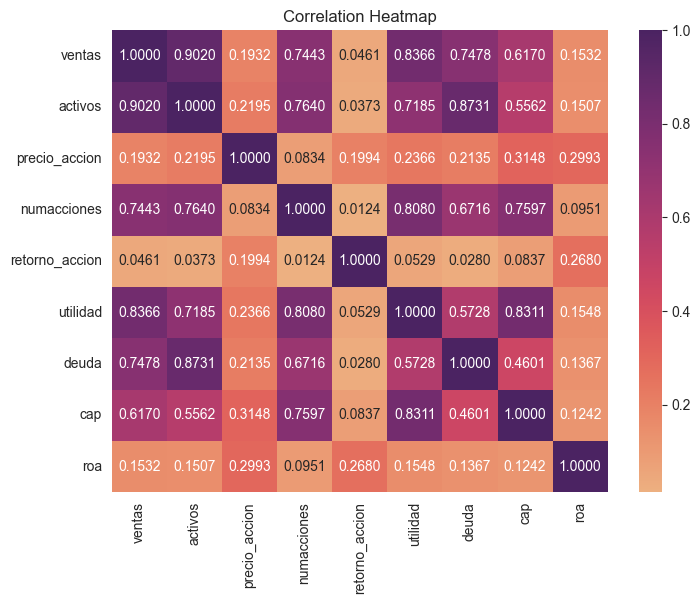

In [63]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt=".4f")
plt.title('Correlation Heatmap')
plt.show()

In [64]:
run_model(df=df, features=['ventas', 'utilidad'], target='roa')

                            OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     10.38
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           3.52e-05
Time:                        07:56:27   Log-Likelihood:                -207.32
No. Observations:                 857   AIC:                             420.6
Df Residuals:                     854   BIC:                             434.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0828      0.011     -7.548      0.0

Predictors are not significant (p > 0.05) and R² is only 0.024, indicating sales and profit alone don't explain ROA variation.

Como el ROA ya incluye dentro de sí datos de ventas y utilidad, crea circularidad

## Challenge 3

### Tamaño

¿El TAMAÑO influye en la productividad?

In [65]:
df['upa'] = df['utilidad'] / df['numacciones'] / df['precio_accion']

UPA (Utility per Action) normalizes profit by both share count and price, creating a standardized profitability metric.

In [66]:
df['percentil'] = pd.qcut(df['cap'], q=3, labels=['sm', 'md', 'lg'])

df = pd.concat([df, pd.get_dummies(df['percentil'], prefix='size', drop_first=True)], axis=1,)

df.drop(columns=['percentil'], inplace=True)

df

,ventas,activos,precio_accion,numacciones,retorno_accion,utilidad,deuda,cap,roa,upa,size_md,size_lg
0,6833000.0,10763000.0,139.03,2.930041e+05,-0.066370,1350000.0,2735000.0,4.073636e+07,0.125430,0.033140,False,True
1,10551000.0,14155000.0,34.00,1.784719e+05,-0.278846,-343000.0,1811000.0,6.068045e+06,-0.024232,-0.056526,False,True
2,217646.0,389186.0,19.32,3.553658e+04,2.324564,-41349.0,82394.0,6.865667e+05,-0.106245,-0.060226,True,False
3,1168518.0,941436.0,73.87,8.124486e+04,0.391070,227494.0,38328.0,6.001558e+06,0.241646,0.037906,False,True
4,383285000.0,352583000.0,171.21,1.563423e+07,0.221365,114301000.0,111088000.0,2.676737e+09,0.324182,0.042702,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1067,4584000.0,7306000.0,273.33,5.135960e+04,0.063902,481000.0,2372000.0,1.403812e+07,0.065836,0.034264,False,True
1068,457433.0,1205345.0,17.75,2.653607e+04,0.642079,-30939.0,517877.0,4.710153e+05,-0.025668,-0.065686,False,False
1069,8544000.0,14286000.0,197.37,4.591137e+05,0.306794,3016000.0,6755000.0,9.061527e+07,0.211116,0.033284,False,True
1070,166424.0,90857.0,2.01,7.134034e+04,-0.710410,-28943.0,1948.0,1.433941e+05,-0.318556,-0.201842,False,False


Companies are split into tertiles by market cap and converted to dummy variables for regression analysis.

In [67]:
X_3a = df[['size_md', 'size_lg']].astype(float)
X_3a = sm.add_constant(X_3a)
y_3a = df['roa']

model_3a = sm.OLS(y_3a, X_3a).fit()
print(model_3a.summary())

                            OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     121.8
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           2.23e-48
Time:                        07:56:27   Log-Likelihood:                -160.46
No. Observations:                1072   AIC:                             326.9
Df Residuals:                    1069   BIC:                             341.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2426      0.015    -16.290      0.0

In [68]:
beta0 = model_3a.params['const']
beta1 = model_3a.params['size_md']
beta2 = model_3a.params['size_lg']

print(f"Empresas PEQUEÑAS:  E[ROA] = {beta0:.4f}")
print(f"Empresas MEDIANAS:  E[ROA] = {beta0:.4f} + {beta1:.4f} = {beta0 + beta1:.4f}")
print(f"Empresas GRANDES:   E[ROA] = {beta0:.4f} + {beta2:.4f} = {beta0 + beta2:.4f}")

Empresas PEQUEÑAS:  E[ROA] = -0.2426
Empresas MEDIANAS:  E[ROA] = -0.2426 + 0.2067 = -0.0359
Empresas GRANDES:   E[ROA] = -0.2426 + 0.3246 = 0.0819


Company size alone explains 18.6% of ROA variation, with larger companies showing progressively higher expected returns.

Las empresas grandes son significativamente ($p$ muy bajo) más productivas que las medianas o pequeñas

### UPA

In [69]:
X_3b = df[['upa', 'size_md', 'size_lg']].astype(float)
X_3b = sm.add_constant(X_3b)
y_3b = df['roa']

model_3b = sm.OLS(y_3b, X_3b).fit()
print(model_3b.summary())

                            OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     474.3
Date:                Mon, 13 Oct 2025   Prob (F-statistic):          8.08e-196
Time:                        07:56:28   Log-Likelihood:                 183.40
No. Observations:                1072   AIC:                            -358.8
Df Residuals:                    1068   BIC:                            -338.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0637      0.012     -5.192      0.0

Adding UPA dramatically improves the model (R² = 0.571), confirming normalized profitability is a key productivity driver.

Agregar el UPA hace que nuestro modelo mejore drásticamente. Esto revela que la utilidad por acción un factor altamente determinante de la productividad.

### Iteracciones

¿El efecto de UPA varía según el TAMAÑO?

In [70]:
df['upa_x_md'] = df['upa'] * df['size_md']
df['upa_x_lg'] = df['upa'] * df['size_lg']

In [71]:
X_3c = df[['size_md', 'size_lg', 'upa', 'upa_x_md', 'upa_x_lg']].astype(float)
X_3c = sm.add_constant(X_3c)
y_3c = df['roa']

model_3c = sm.OLS(y_3c, X_3c).fit()
print(model_3c.summary())

                            OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     290.5
Date:                Mon, 13 Oct 2025   Prob (F-statistic):          3.83e-196
Time:                        07:56:28   Log-Likelihood:                 190.36
No. Observations:                1072   AIC:                            -368.7
Df Residuals:                    1066   BIC:                            -338.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0746      0.013     -5.945      0.0

Interaction terms test whether the UPA-ROA relationship differs by company size. The model improves slightly (R² = 0.577).

In [72]:
b0 = model_3c.params['const']
b1 = model_3c.params['size_md']
b2 = model_3c.params['size_lg']
b3 = model_3c.params['upa']
b4 = model_3c.params['upa_x_md']
b5 = model_3c.params['upa_x_lg']

print(f"\n1️⃣ Empresas PEQUEÑAS (size_md=0, size_lg=0):")
print(f"   E[ROA] = {b0:.4f} + {b3:.4f}*UPA")
print(f"   → Intercepto: {b0:.4f}")
print(f"   → Pendiente de UPA: {b3:.4f}")

print(f"\n2️⃣ Empresas MEDIANAS (size_md=1, size_lg=0):")
print(f"   E[ROA] = ({b0:.4f} + {b1:.4f}) + ({b3:.4f} + {b4:.4f})*UPA")
print(f"   E[ROA] = {b0+b1:.4f} + {b3+b4:.4f}*UPA")
print(f"   → Intercepto: {b0+b1:.4f}")
print(f"   → Pendiente de UPA: {b3+b4:.4f}")

print(f"\n3️⃣ Empresas GRANDES (size_md=0, size_lg=1):")
print(f"   E[ROA] = ({b0:.4f} + {b2:.4f}) + ({b3:.4f} + {b5:.4f})*UPA")
print(f"   E[ROA] = {b0+b2:.4f} + {b3+b5:.4f}*UPA")
print(f"   → Intercepto: {b0+b2:.4f}")
print(f"   → Pendiente de UPA: {b3+b5:.4f}")



1️⃣ Empresas PEQUEÑAS (size_md=0, size_lg=0):
   E[ROA] = -0.0746 + 0.8427*UPA
   → Intercepto: -0.0746
   → Pendiente de UPA: 0.8427

2️⃣ Empresas MEDIANAS (size_md=1, size_lg=0):
   E[ROA] = (-0.0746 + 0.0417) + (0.8427 + 0.2784)*UPA
   E[ROA] = -0.0329 + 1.1211*UPA
   → Intercepto: -0.0329
   → Pendiente de UPA: 1.1211

3️⃣ Empresas GRANDES (size_md=0, size_lg=1):
   E[ROA] = (-0.0746 + 0.1096) + (0.8427 + 0.1683)*UPA
   E[ROA] = 0.0350 + 1.0110*UPA
   → Intercepto: 0.0350
   → Pendiente de UPA: 1.0110


Medium companies show the strongest UPA effect (slope = 1.12), suggesting they benefit most from profitability improvements. Large company interaction is not significant (p = 0.261).

## Challenge 4

In [73]:
df['ln_debt'] = df['deuda'] / df['activos']
df['sqrd_debt'] = df['ln_debt'] ** 2

df.head()

,ventas,activos,precio_accion,numacciones,retorno_accion,utilidad,deuda,cap,roa,upa,size_md,size_lg,upa_x_md,upa_x_lg,ln_debt,sqrd_debt
0,6833000.0,10763000.0,139.03,2.930041e+05,-0.066370,1350000.0,2735000.0,4.073636e+07,0.125430,0.033140,False,True,0.000000,0.033140,0.254111,0.064573
1,10551000.0,14155000.0,34.00,1.784719e+05,-0.278846,-343000.0,1811000.0,6.068045e+06,-0.024232,-0.056526,False,True,-0.000000,-0.056526,0.127941,0.016369
2,217646.0,389186.0,19.32,3.553658e+04,2.324564,-41349.0,82394.0,6.865667e+05,-0.106245,-0.060226,True,False,-0.060226,-0.000000,0.211709,0.044821
3,1168518.0,941436.0,73.87,8.124486e+04,0.391070,227494.0,38328.0,6.001558e+06,0.241646,0.037906,False,True,0.000000,0.037906,0.040712,0.001657
4,383285000.0,352583000.0,171.21,1.563423e+07,0.221365,114301000.0,111088000.0,2.676737e+09,0.324182,0.042702,False,True,0.000000,0.042702,0.315069,0.099269


Leverage ratio (debt/assets) and its square test for non-linear debt effects on productivity.

In [74]:
X_4 = df[['size_md', 'size_lg', 'upa', 'upa_x_md', 'upa_x_lg', 'ln_debt', 'sqrd_debt']].astype(float)
X_4 = sm.add_constant(X_4)
y_4 = df[['roa']]

X_4 = X_4.replace([np.inf, -np.inf], np.nan).dropna()
y_4 = y_4.loc[X_4.index]

model_4 = sm.OLS(y_4, X_4).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    roa   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     221.5
Date:                Mon, 13 Oct 2025   Prob (F-statistic):          1.54e-202
Time:                        07:56:28   Log-Likelihood:                 210.64
No. Observations:                1069   AIC:                            -405.3
Df Residuals:                    1061   BIC:                            -365.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0684      0.014     -4.804      0.0

The significant negative quadratic term (p < 0.001) indicates ROA decreases at high leverage levels, suggesting an optimal debt ratio exists. Final R² = 0.594.

# Workshop 2

## Challenge 1

### Hat Matrix

In [75]:
X = X_4

XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)

H = X.values @ XtX_inv @ X.T

print(H)

          0         1         2         3         4         5         6     \
0     0.002939  0.003647  0.000071  0.002986  0.002838  0.002736  0.000065   
1     0.003647  0.008955  0.000194  0.004234  0.002905  0.002241  0.000401   
2     0.000071  0.000194  0.003288  0.000185  0.000023 -0.000080  0.000088   
3     0.002986  0.004234  0.000185  0.004524  0.002555  0.001803  0.000654   
4     0.002838  0.002905  0.000023  0.002555  0.002875  0.002962 -0.000087   
...        ...       ...       ...       ...       ...       ...       ...   
1064  0.002895  0.003323  0.000021  0.002529  0.002904  0.003000 -0.000110   
1065 -0.000096 -0.000844 -0.000136 -0.001511  0.000249  0.000895  0.001608   
1066  0.002813  0.002847 -0.000101  0.001686  0.003013  0.003484 -0.000444   
1067  0.000086  0.000694  0.000120  0.001217 -0.000193 -0.000716  0.003280   
1068  0.002931  0.003612  0.000103  0.003337  0.002768  0.002516  0.000206   

          7         8         9     ...      1062      1063    

The hat matrix H projects observations onto predicted values (ŷ = Hy). Diagonal elements measure each observation's influence on its own fitted value.

### Leverages

Leverage criteria:

$$
h_{ii} > 3 \left( \frac{k+1}{n} \right)
$$

In [76]:
lev_values = np.diag(H)

n = len(X)
k = X.shape[1]
lev_threshold = 2 * k / n

high_lev_indices = np.where(lev_values > lev_threshold)[0]
high_lev_values = lev_values[high_lev_indices]

print("Observations with high leverage: \n", high_lev_indices)
print("High leverage values: \n", high_lev_values)

Observations with high leverage: 
 [  20   55   71   79   80   89  125  128  152  154  164  190  203  206
  212  256  269  290  293  294  303  308  329  420  455  464  475  476
  480  496  555  624  625  630  644  651  699  717  729  743  758  768
  788  808  812  819  828  830  837  845  877  879  917  926  961  968
  969  998 1002 1004 1006 1016 1023 1025 1032 1044 1051]
High leverage values: 
 [0.02007632 0.01930452 0.01543366 0.02024339 0.01588028 0.01700302
 0.79432597 0.04310433 0.01535681 0.02233018 0.07346515 0.03929659
 0.0155807  0.02356111 0.02167898 0.01980062 0.0200194  0.02211551
 0.01577276 0.0234759  0.01689254 0.03154083 0.02424861 0.04047256
 0.0549317  0.01781214 0.02067214 0.03029861 0.01740086 0.0616679
 0.07380132 0.042878   0.02887872 0.02347005 0.0259912  0.01709454
 0.11772288 0.0192069  0.01891992 0.1353431  0.0151278  0.03103759
 0.03075172 0.01626847 0.05068104 0.01833958 0.13966133 0.0302348
 0.02716563 0.03277391 0.04341081 0.01506695 0.01508682 0.06075437

65 high-leverage observations identified. Observation 125 shows extreme leverage (0.794), meaning it heavily influences the model fit.

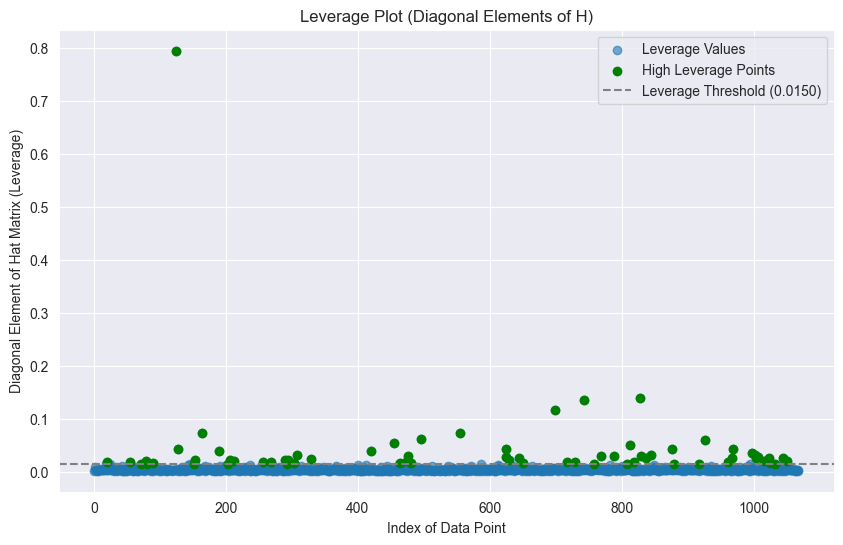

In [77]:
# Diagonal H Matrix
h_diag = np.diag(H)

# Index
index = np.arange(len(h_diag))

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Leverage values
plt.scatter(range(len(lev_values)), lev_values, alpha=0.6, label='Leverage Values')

# High leverage points
plt.scatter(high_lev_indices, high_lev_values, color='green', label='High Leverage Points')
plt.axhline(y=lev_threshold, color='gray', linestyle='--', label=f'Leverage Threshold ({lev_threshold:.4f})')
plt.xlabel("Index of Data Point")
plt.ylabel("Diagonal Element of Hat Matrix (Leverage)")
plt.title("Leverage Plot (Diagonal Elements of H)")
plt.legend()
plt.grid(True)
plt.show()

### Outliers

In [80]:
y = y_4.values.reshape(-1, 1)
y_hat = H @ y

display(y_hat)

,0
0,0.078052
1,-0.001930
2,-0.087845
3,0.085272
4,0.084169
...,...
1064,0.075861
1065,-0.136064
1066,0.064447
1067,-0.238071


#### Ordinary residuals

$$
e = y - \hat{y} = (I - H) y
$$

In [83]:
e = y - y_hat
e = e.values.flatten()

display(e)

array([ 0.04737769, -0.02230179, -0.01839974, ...,  0.14666834,
       -0.08048419, -0.01217589], shape=(1069,))

In [84]:
residuals_df = pd.DataFrame({
    'y_real': y.flatten(),
    'y_hat': y_hat.values.flatten(),
    'residual': e
})
residuals_df.head()

,y_real,y_hat,residual
0,0.125430,0.078052,0.047378
1,-0.024232,-0.001930,-0.022302
2,-0.106245,-0.087845,-0.018400
3,0.241646,0.085272,0.156374
4,0.324182,0.084169,0.240013


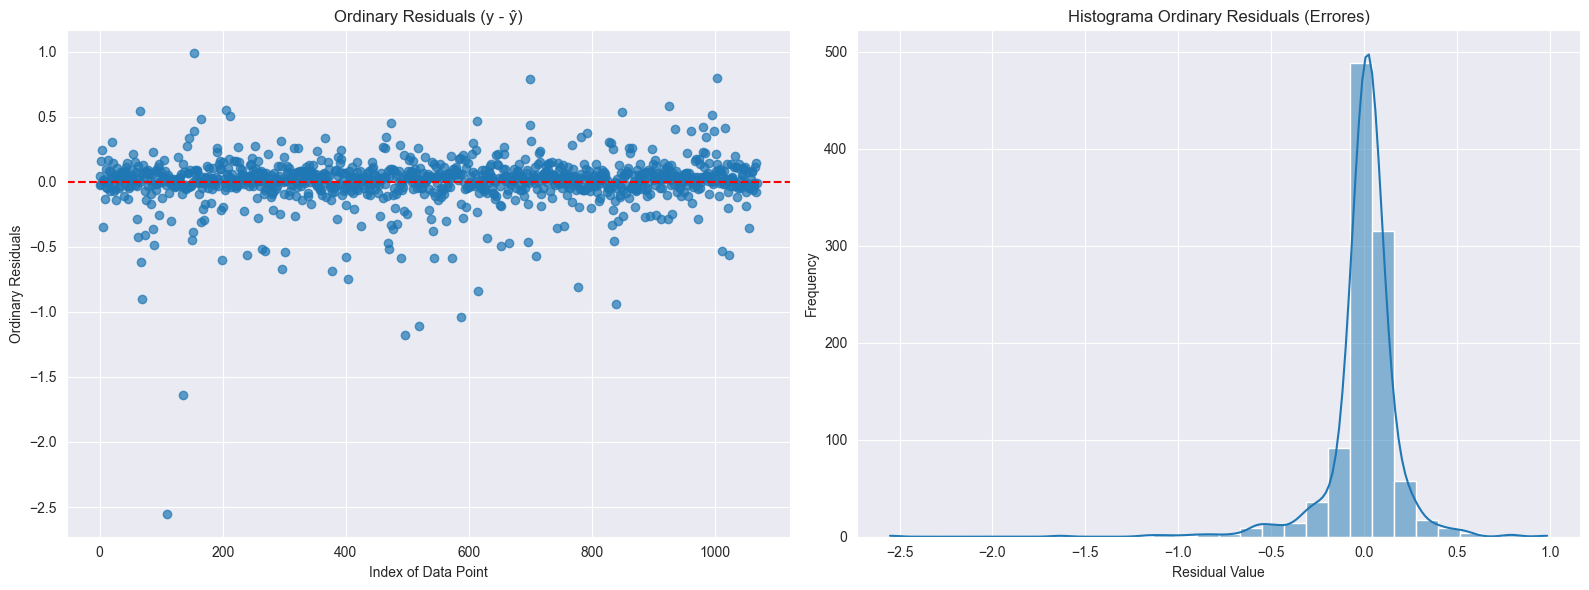

In [85]:
# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # 1 row, 2 columns

# Scatter plot of ordinary residuals
axes[0].scatter(range(len(e)), e, alpha=0.7)
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_xlabel('Index of Data Point')
axes[0].set_ylabel('Ordinary Residuals')
axes[0].set_title('Ordinary Residuals (y - ŷ)')
axes[0].grid(True)

# Histogram of the residuals
sns.histplot(e, kde=True, bins=30, ax=axes[1])
axes[1].set_title('Histograma Ordinary Residuals (Errores)')
axes[1].set_xlabel('Residual Value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

Residuals show strong left skew and heavy tails, indicating non-normality and potential outliers with extreme negative ROA values.

#### Standarized residuals

$$
s = \sqrt{\frac{\sum{e^2_i}{}}{n-k}}
$$

$$
r_i = \frac{e_i}{s\sqrt{1-h_{ii}}}
$$

In [86]:
s = np.sum(e**2) / (n - k)
s = np.sqrt(s)

In [88]:
r = e / (s * np.sqrt(1 - h_diag))

Standardized residuals account for variance and leverage, making outliers more comparable across observations.

In [89]:
residuals_df["standardized_residuals"] = r
residuals_df.head()

,y_real,y_hat,residual,standardized_residuals
0,0.125430,0.078052,0.047378,0.237900
1,-0.024232,-0.001930,-0.022302,-0.112324
2,-0.106245,-0.087845,-0.018400,-0.092408
3,0.241646,0.085272,0.156374,0.785830
4,0.324182,0.084169,0.240013,1.205148


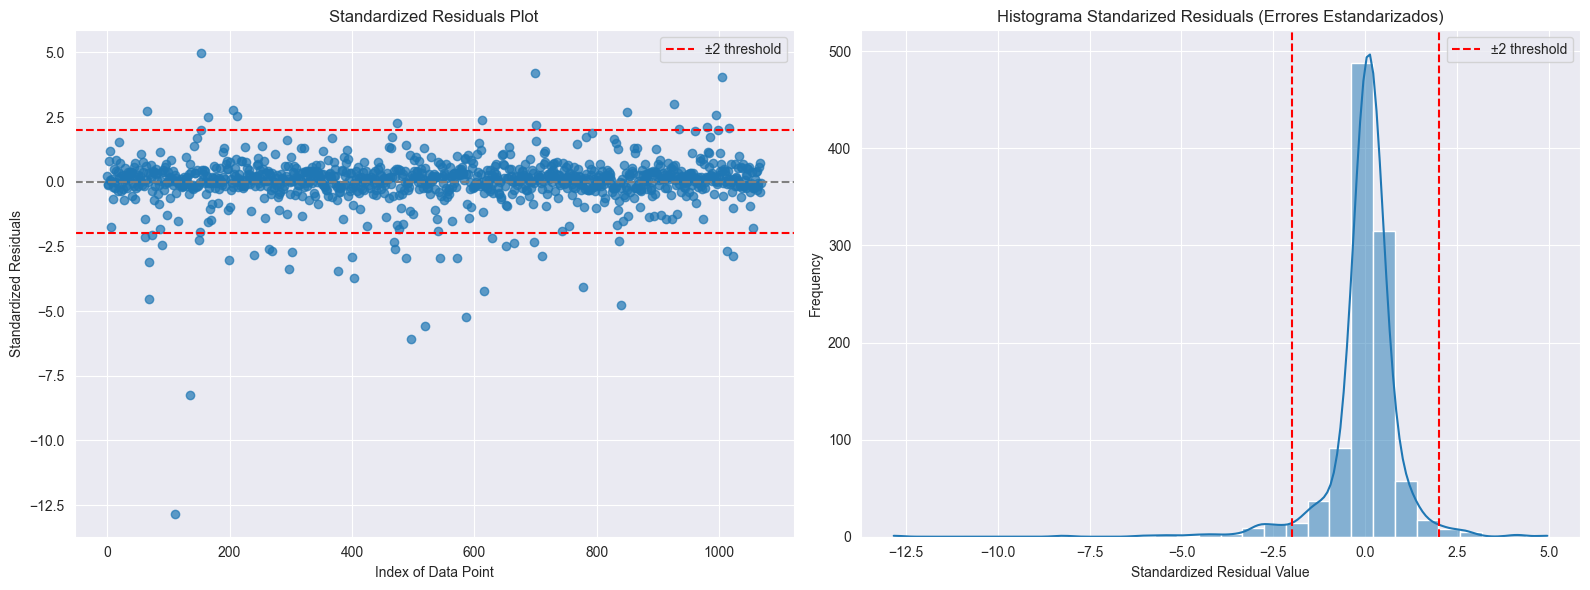

In [90]:
# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # 1 row, 2 columns

# Scatter plot of standardized residuals
axes[0].scatter(range(len(r)), r, alpha=0.7)
axes[0].axhline(y=0, color='gray', linestyle='--')
axes[0].axhline(y=2, color='red', linestyle='--', label='±2 threshold')
axes[0].axhline(y=-2, color='red', linestyle='--')
axes[0].set_xlabel('Index of Data Point')
axes[0].set_ylabel('Standardized Residuals')
axes[0].set_title('Standardized Residuals Plot')
axes[0].legend()
axes[0].grid(True)

# Histogram of the standardized residuals
sns.histplot(r, kde=True, bins=30, ax=axes[1])
axes[1].axvline(x=2, color='red', linestyle='--', label='±2 threshold')
axes[1].axvline(x=-2, color='red', linestyle='--')
axes[1].set_title('Histograma Standarized Residuals (Errores Estandarizados)')
axes[1].set_xlabel('Standardized Residual Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

In [91]:
outlier_indices = np.where(np.abs(r) > 2)[0]
print("Posibles outliers (|r_i| > 2):", outlier_indices)

Posibles outliers (|r_i| > 2): [  62   65   68   69   73   89  110  136  150  153  164  199  206  212
  240  264  269  297  302  377  400  403  469  470  473  489  496  519
  543  572  587  613  615  629  652  665  697  699  700  710  778  836
  840  849  926  935  980  995 1004 1012 1016 1023]


52 potential outliers detected. These observations have prediction errors more than 2 standard deviations from the mean.

#### Deleted residuals

$$
e_{(i)} = \frac{e_i}{1-h_{ii}}
$$

In [97]:
e_res = e / (1 - h_diag)
residuals_df[('deleted_residuals')] = e_res
residuals_df['abs_deleted_residuals'] = np.abs(e_res)

top_deleted = residuals_df.sort_values('abs_deleted_residuals', ascending=False).head(20)
display(top_deleted[['y_real','y_hat','residual','deleted_residuals','abs_deleted_residuals']])

,y_real,y_hat,residual,deleted_residuals,abs_deleted_residuals
110,-3.010540,-0.459418,-2.551122,-2.567243,2.567243
136,-1.933138,-0.296014,-1.637124,-1.643763,1.643763
496,-2.006971,-0.832408,-1.174564,-1.251757,1.251757
519,-1.529326,-0.418687,-1.110639,-1.115562,1.115562
587,-1.777851,-0.741337,-1.036514,-1.051893,1.051893
153,1.002075,0.016279,0.985796,0.992193,0.992193
840,-1.544299,-0.601492,-0.942807,-0.950139,0.950139
69,-1.176937,-0.278397,-0.898540,-0.902035,0.902035
699,-0.315168,-1.104569,0.789401,0.894731,0.894731
615,-1.041560,-0.203745,-0.837815,-0.840878,0.840878


Deleted residuals simulate leave-one-out cross-validation. Observation 110 shows the largest error (e = -2.57), indicating it's poorly predicted.

In [99]:
PRESS = np.sum(e_res**2)
print(f"PRESS (Sum de los Squared Deleted Residuals) = {PRESS:.6f}")

PRESS (Sum de los Squared Deleted Residuals) = 43.401321


PRESS statistic (43.40) provides a cross-validated measure of prediction error, useful for model comparison.

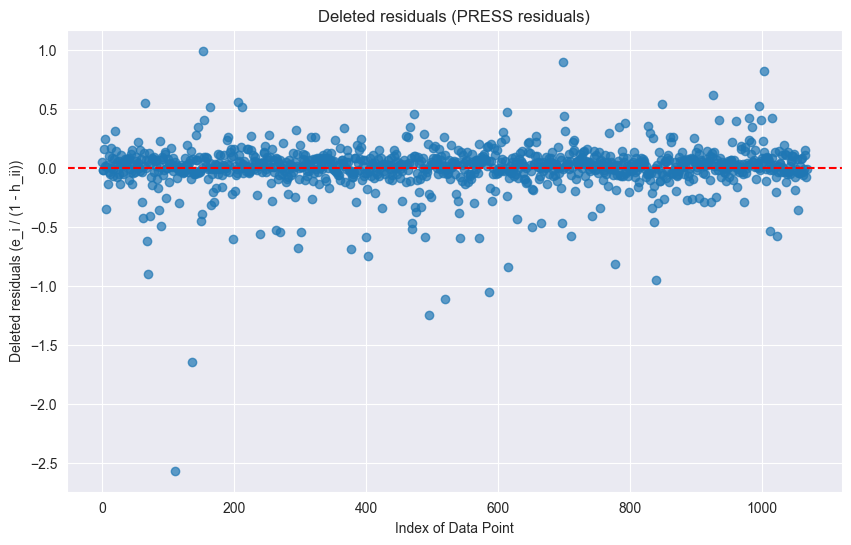

In [100]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(e_res)), e_res, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Index of Data Point')
plt.ylabel('Deleted residuals (e_i / (1 - h_ii))')
plt.title('Deleted residuals (PRESS residuals)')
plt.grid(True)
plt.show()

#### Studentized residuals

$$
s_{(i)} = \sqrt{\frac{\frac{(n-k-1)s^2-e^2_i}{(1- h_{ii})}}{n-k-2}}
$$

$$
t_i = \frac{e_i}{s_{(i)}\sqrt{1-h_{ii}}}
$$

In [101]:
s_squared = np.sum(e**2) / (n - k)
s = np.sqrt(s_squared)

In [102]:
s_i = np.sqrt(((n - k - 1) * s_squared - (e**2) / (1 - h_diag)) / (n - k - 2))

In [103]:
studentized_deleted_residuals = e / (s_i * np.sqrt(1 - h_diag))
residuals_df["studentized_deleted_residuals"] = studentized_deleted_residuals
residuals_df.head()

,y_real,y_hat,residual,standardized_residuals,deleted-residuals,abs_deleted_resid,abs_deleted_residuals,deleted_residuals,studentized_deleted_residuals
0,0.125430,0.078052,0.047378,0.237900,0.047517,0.047517,0.047517,0.047517,0.237794
1,-0.024232,-0.001930,-0.022302,-0.112324,-0.022503,0.022503,0.022503,-0.022503,-0.112272
2,-0.106245,-0.087845,-0.018400,-0.092408,-0.018460,0.018460,0.018460,-0.018460,-0.092364
3,0.241646,0.085272,0.156374,0.785830,0.157084,0.157084,0.157084,0.157084,0.785688
4,0.324182,0.084169,0.240013,1.205148,0.240705,0.240705,0.240705,0.240705,1.205405


Studentized deleted residuals follow a t-distribution and are the most robust outlier detection method, adjusting for both leverage and variance.

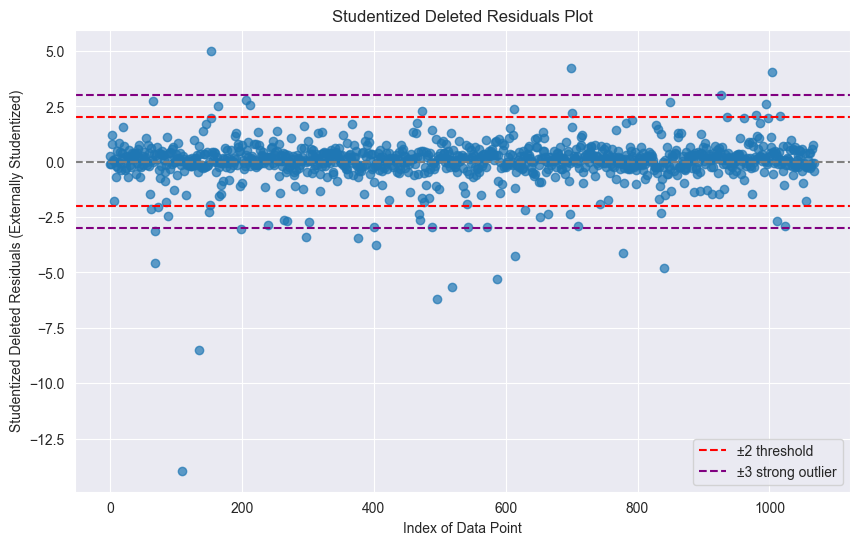

In [104]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(studentized_deleted_residuals)), studentized_deleted_residuals, alpha=0.7)
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(2, color='red', linestyle='--', label='±2 threshold')
plt.axhline(-2, color='red', linestyle='--')
plt.axhline(3, color='purple', linestyle='--', label='±3 strong outlier')
plt.axhline(-3, color='purple', linestyle='--')
plt.xlabel('Index of Data Point')
plt.ylabel('Studentized Deleted Residuals (Externally Studentized)')
plt.title('Studentized Deleted Residuals Plot')
plt.legend()
plt.grid(True)
plt.show()

In [105]:
outlier_indices_studentized = np.where(np.abs(studentized_deleted_residuals) > 2)[0]
print("Posibles outliers (|t_i| > 2):", outlier_indices_studentized)

Posibles outliers (|t_i| > 2): [  62   65   68   69   73   89  110  136  150  153  164  199  206  212
  240  264  269  297  302  377  400  403  469  470  473  489  496  519
  543  572  587  613  615  629  652  665  697  699  700  710  778  836
  840  849  926  935  980  995 1004 1012 1016 1023]


The same 52 outliers are consistently identified across methods, confirming these companies have ROA values that deviate substantially from model predictions.